# Лабораторная работа 4  
  
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


# Шаг 1. Откройте файл с данными и изучите общую информацию

Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении  

<em>Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.</em>


In [1]:
import pandas as pd 
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


# Шаг 2. Предобработка данных

* определите и изучите пропущенные значения:
  *  для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
  * заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
  * укажите причины, которые могли привести к пропускам в данных.

In [4]:
df.columns[df.isna().any()].tolist()

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

C:\Users\katia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Зависимость общей площади от жилой площади'}, xlabel='kitchen_area', ylabel='total_area'>

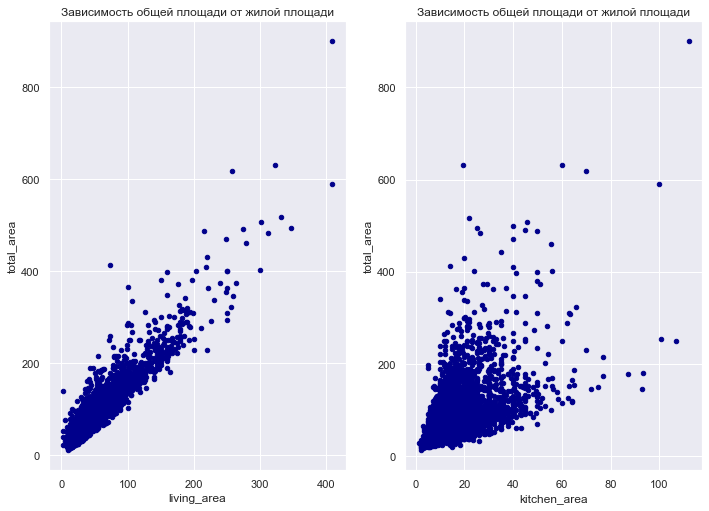

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df.plot.scatter(x='living_area',  y='total_area', c='DarkBlue', ax=axes[0], title = 'Зависимость общей площади от жилой площади')
df.plot.scatter(x='kitchen_area',  y='total_area', c='DarkBlue', ax=axes[1], title = 'Зависимость общей площади от жилой площади')

In [6]:
# заполнение значений балкона

df.balcony = df.balcony.replace(np.nan, 0)

# заполнение значений жилой площади
ratio_living_total_area = (df.living_area/df.total_area).mean()
df.loc[df.living_area.isnull(), 'living_area'] = df.total_area*ratio_living_total_area

# заполнение значений площади кухни
ratio_kitchen_total_area = (df.kitchen_area/df.total_area).mean()
df.loc[df.kitchen_area.isnull(), 'kitchen_area'] = df.total_area*ratio_kitchen_total_area


<font color='green'><b>Вывод:</b> Столбцы, в которых заполнили пропущенные значения:
<b><em>living_area</em></b> - общая площадь умноженная на процент отношения жилой площади к общей, так как отслеживается зависимость на графике; 
<b><em>kitchen_area</em></b> - общая площадь умноженная на процент отношения площади кухни к общей, так как отслеживается зависимость на графике; 
<b><em>balcony</em></b> - все значения были заменены на нули;
</font> 

* приведите данные к нужным типам:
  * поясните, в каких столбцах нужно изменить тип данных и почему.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
df.floors_total = pd.to_numeric(df.floors_total, errors='coerce').astype('Int64')
df.balcony = pd.to_numeric(df.balcony, errors='coerce').astype('Int64')
df.parks_around3000 = pd.to_numeric(df.parks_around3000, errors='coerce').astype('Int64')
df.ponds_around3000 = pd.to_numeric(df.ponds_around3000, errors='coerce').astype('Int64')
df.is_apartment = df.is_apartment.astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

<font color='green'><b>Вывод:</b> Столбцы <b><em>floors_total, balcony, parks_around3000 и ponds_around3000</em></b> были заменены на тип данных int64, так как они принимают только целые значения; столбец <b><em>first_day_exposition</em></b> был переведен в datetime, значения времени убрали, так как для всех строк оно было одинаковым 00:00:00; <b><em>is_apartment</em></b> перевели в тип bool.</font> 

# Шаг 3. Посчитайте и добавьте в таблицу:

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [9]:
import datetime as dt

In [10]:
# цена квадратного метра

df['sme_price'] =  df['last_price']/df['total_area']

In [11]:
# день недели, месяц и год публикации объявления

df['day-of-week'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [12]:
# этаж квартиры: первый, последний, другой

def func(row):
    floor, floors_total = row["floor"], row["floors_total"]
    if pd.isna(floor):
        return 'Other'
    if floor == 1:
        return "First"
    if pd.isna(floors_total):
        return 'Other'
    if floor == floors_total:
        return "Last"
    return "Other"

df['floor_type'] = df[["floor", "floors_total"]].apply(lambda x: func(x), axis=1)

In [13]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей.

df['living_total'] =  df['living_area']/df['total_area']
df['kitchen_total'] =  df['kitchen_area']/df['total_area']

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

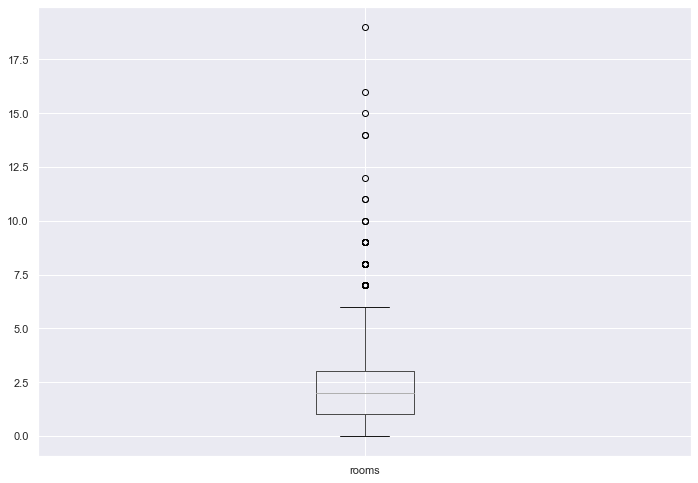

In [14]:
df.boxplot(column=['rooms'])
df.rooms.value_counts()

3.0      10482
2.0       3586
4.0        392
5.0          9
27.0         8
25.0         7
6.0          4
8.0          4
32.0         2
1.0          2
24.0         1
23.0         1
28.0         1
26.0         1
100.0        1
14.0         1
20.0         1
10.0         1
Name: ceiling_height, dtype: int64

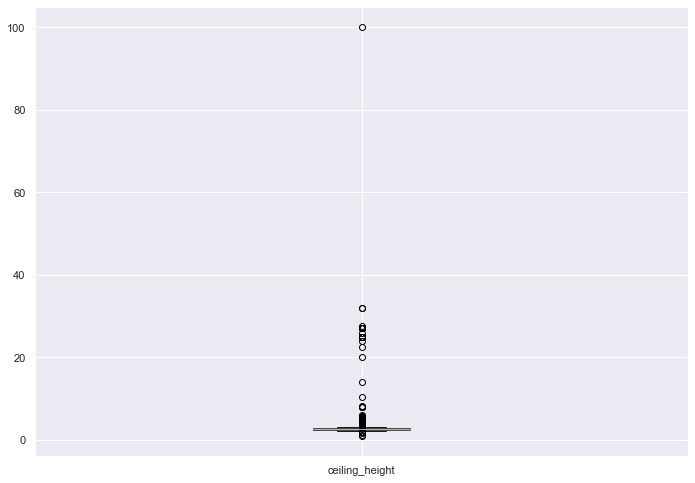

In [15]:
df.boxplot(column=['ceiling_height'])
df.ceiling_height.round().value_counts()

In [16]:
df = df[(df.rooms < 7) & (df.ceiling_height < 4.5) & (df.ceiling_height > 1.5)]

<font color='green'><b>Вывод:</b> Очень мало квартир с более чем 7 комнатами и квартир с выссотой потолков 1м и более 5м. Такие данные были удалены из выборки. 
</font> 

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

total_area 
mean:  60.810731809020616
last_price 
mean:  6613784.171936897
rooms 
mean:  2.1098061018833834
ceiling_height 
mean:  2.7209500312738366


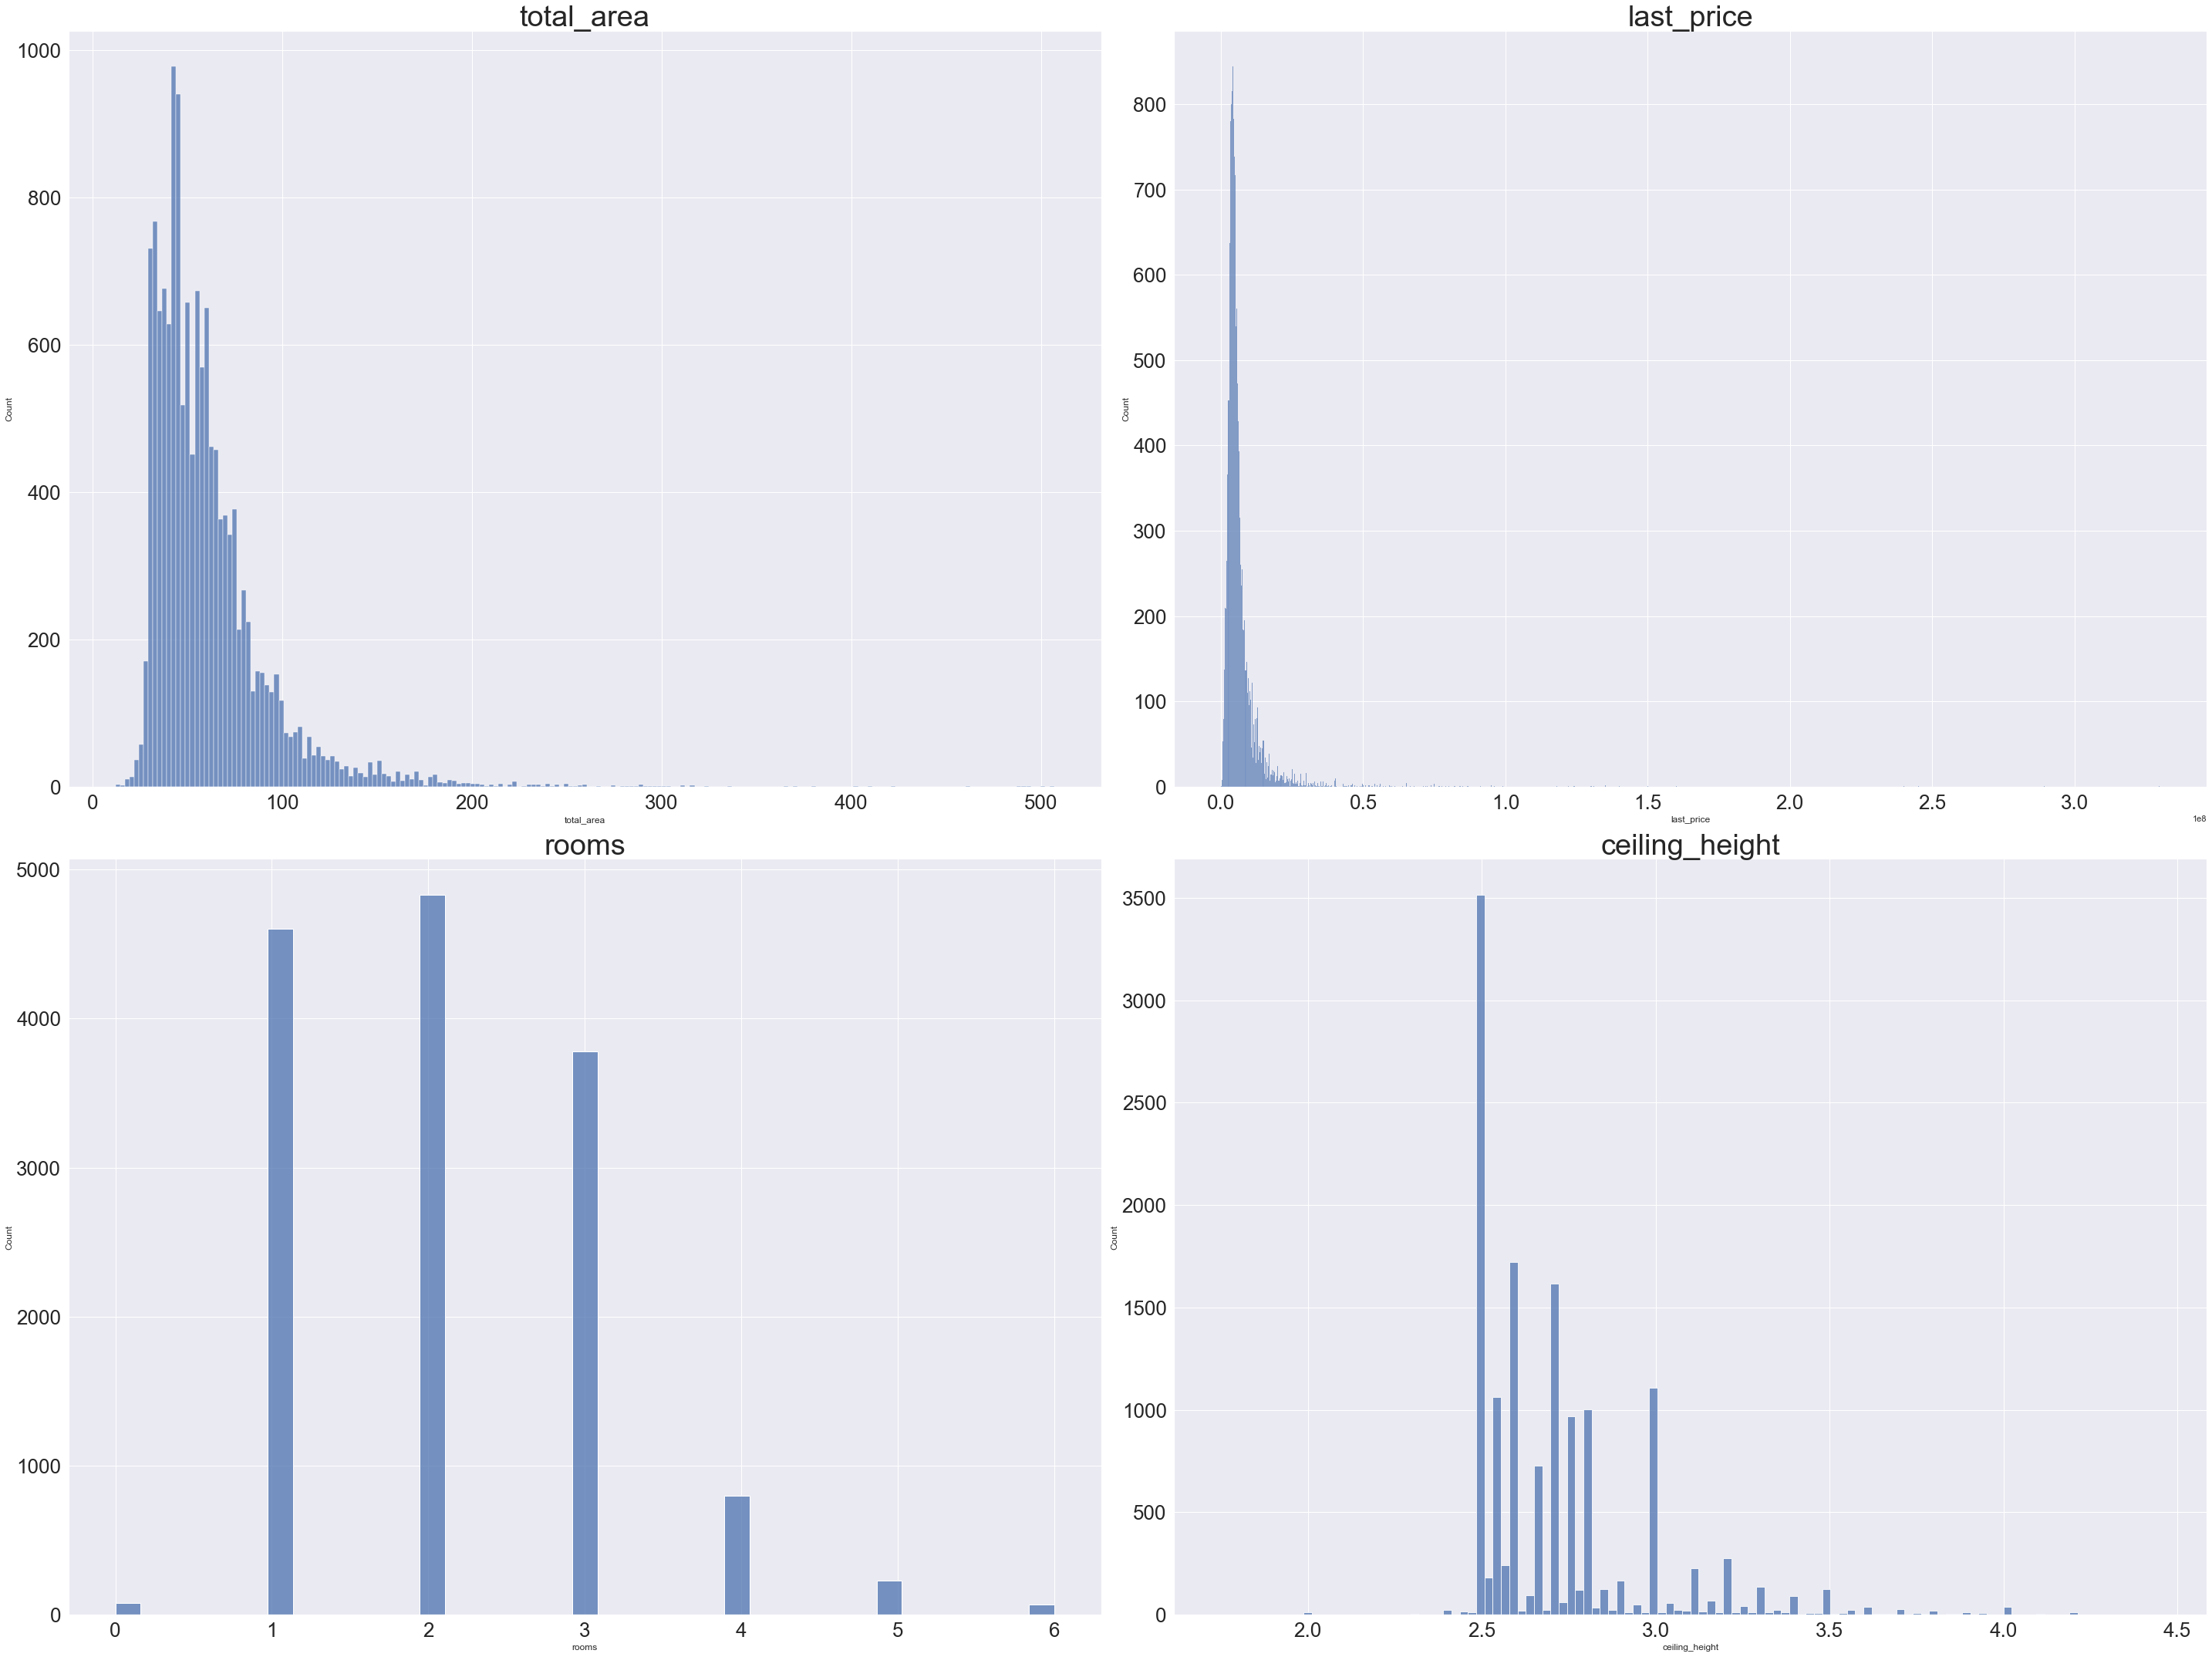

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(40, 30))

names = [['total_area', 'last_price'], ['rooms', 'ceiling_height']]

for i in range(2):
    for j in range(2):
        column_name = names[i][j]
        print(column_name, '\nmean: ', df[column_name].mean())
        ax = axs[i, j]
        sns.histplot(ax=ax, data=df, x=column_name)
        ax.tick_params(axis='x', labelsize = 26)
        ax.tick_params(axis='y', labelsize = 26) 
        ax.set_title(column_name, fontsize=38)
        
fig.tight_layout()
plt.show()

<font color='green'><b>Вывод:</b> По графикам видно, что значения площади, цены, количетсва комнат и высоты потолка соответствуют нормальному распределению со смещением влево. Среднее значение площади составляет 60 квдаратных метров, средняя цена 6,6 млн. В большей продаются продаются двухкомнатные квартиры и высота потолков около 2,7 м.</font>

* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

<AxesSubplot:xlabel='days_exposition', ylabel='Count'>

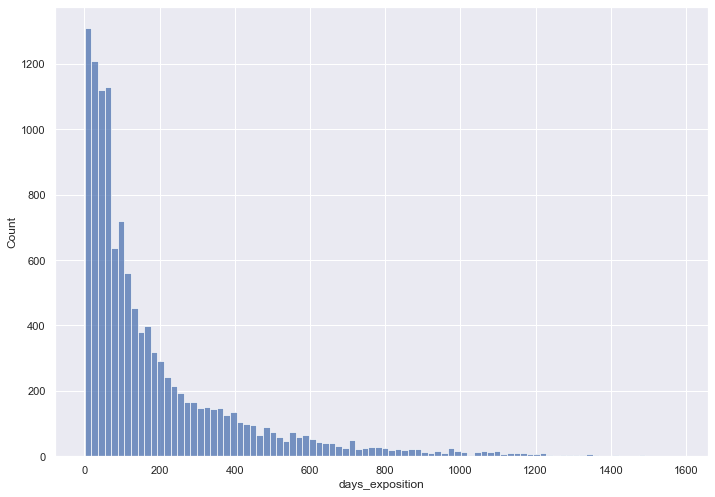

In [18]:
sns.histplot(data=df, x="days_exposition")

In [19]:
df.days_exposition.agg(['mean', 'median'])

mean      190.126044
median    103.000000
Name: days_exposition, dtype: float64

In [20]:
int(df.days_exposition.quantile(.25))

45

In [21]:
int(df.days_exposition.quantile(.75))

247

<font color='green'><b>Вывод:</b> В среднем квартира продается на 190 день. Можно считать, что продажи прошли слишком быстро, если это заняло менее 45 дней, а если продажа длится более 247 дней, то она считается долгой
</font> 

* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

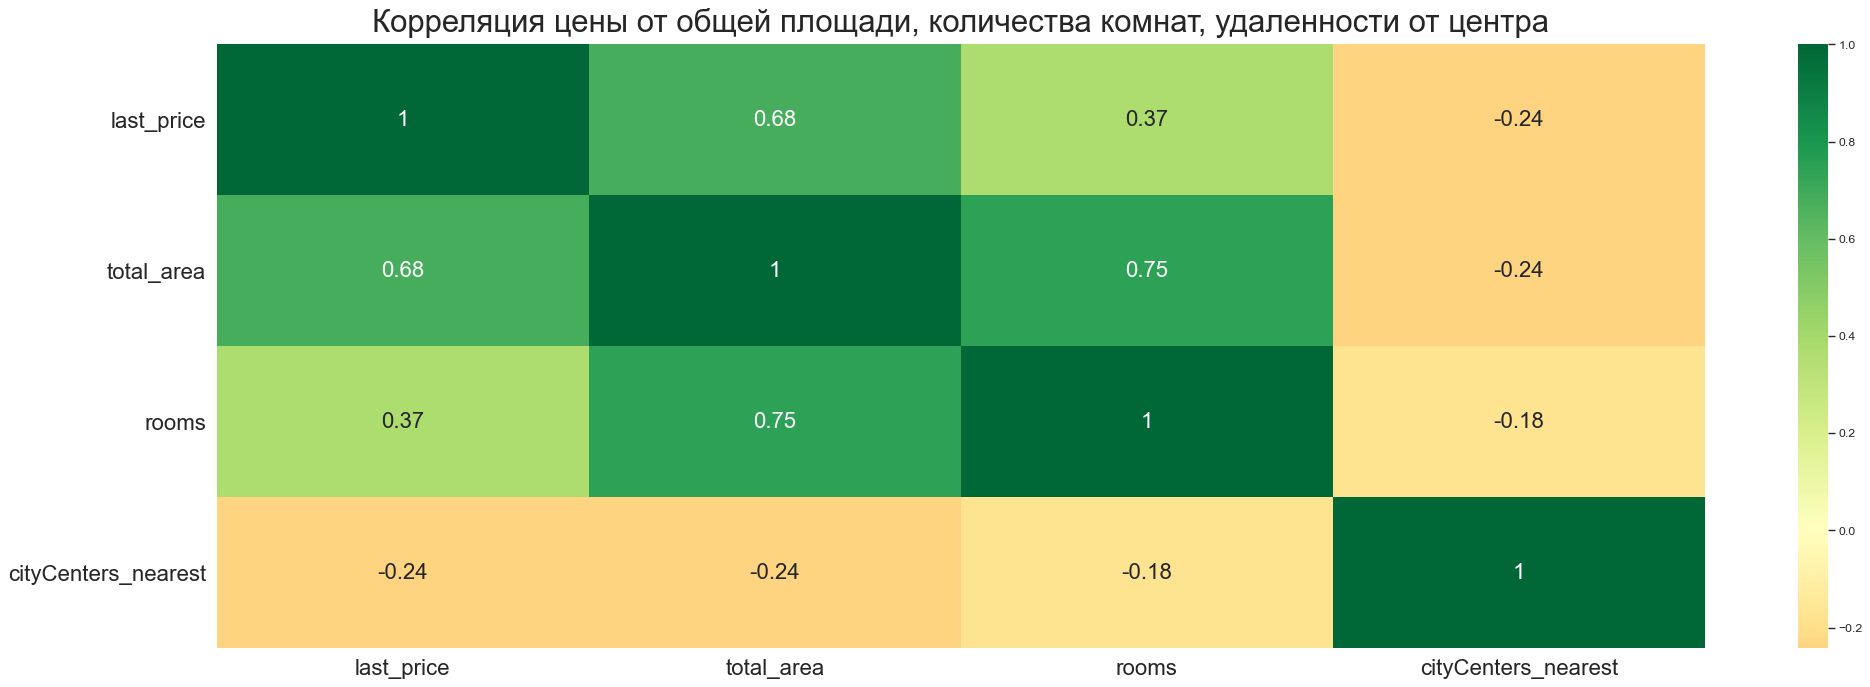

In [22]:
plt.figure(figsize=(30,10), dpi= 80)
corr_data = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
sns.heatmap(corr_data.corr(), 
            xticklabels=corr_data.corr().columns, yticklabels=corr_data.corr().columns, 
            cmap='RdYlGn', center=0, annot=True, annot_kws={"fontsize":20})

# Decorations
plt.title('Корреляция цены от общей площади, количества комнат, удаленности от центра', fontsize=28, va='bottom')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20, rotation=0)
plt.show()

C:\Users\katia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


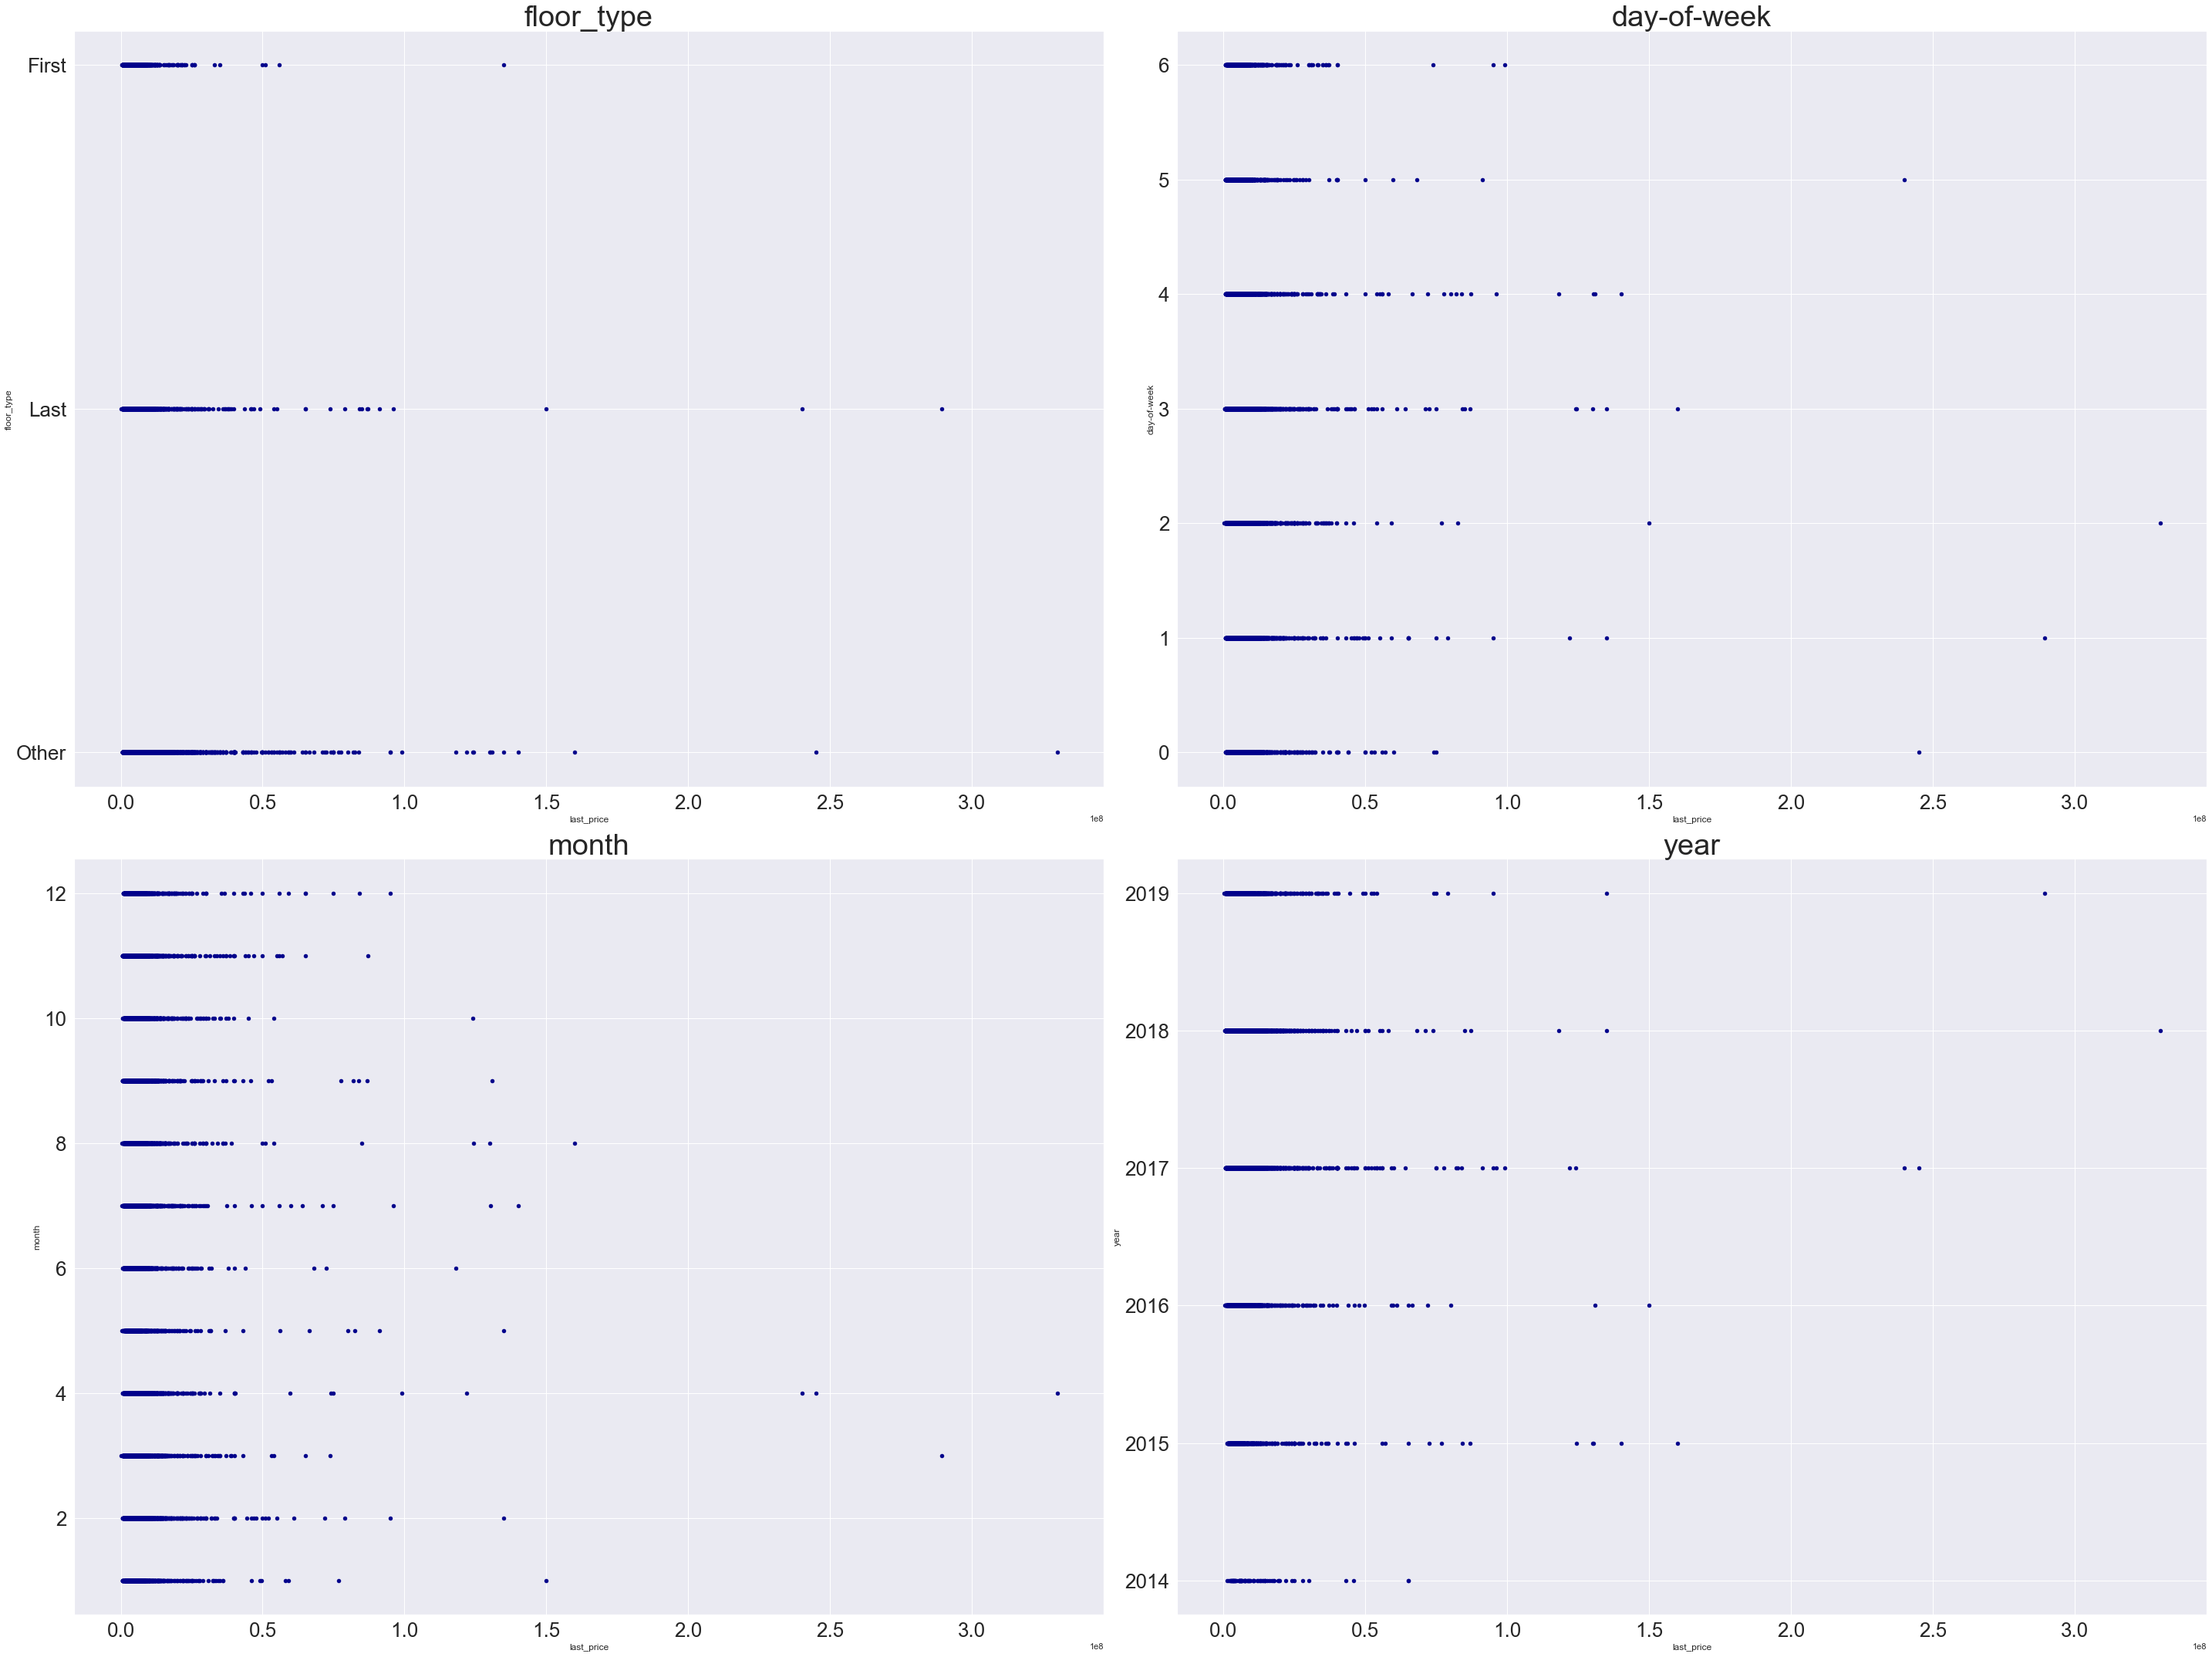

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(40, 30))

names = [['floor_type', 'day-of-week'], ['month', 'year']]

for i in range(2):
    for j in range(2):
        column_name = names[i][j]
        ax = axs[i, j]
        df.plot.scatter(x='last_price',  y=column_name,c='DarkBlue', ax=ax)
        ax.tick_params(axis='x', labelsize = 26)
        ax.tick_params(axis='y', labelsize = 26) 
        ax.set_title(column_name, fontsize=38)
        
fig.tight_layout()
plt.show()

<font color='green'><b>Вывод:</b> Цена в больше степени зависит от общей площади квартиры, также имеется значительная корреляция с количеством комнат. Зависимость между ценой и удаленности от центра обратная, но она меньше, чем предыдущие факторы. По графику floor_type можно заметить, что квартиры на 1 этаже стоят дешевле остальных. Также объявления, размещенные в воскресенье продаются с незначительно меньшей стоимостью. По графику year видно, что в 2014 году квартиры стоили дешевле, чем в последующих годах.
</font> 

* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [24]:
top10 = df.groupby(['locality_name'])['locality_name'].count().nlargest(10)
df_top10 = df.loc[df['locality_name'].isin(top10.index)]
df_mean = df_top10.groupby([df_top10.locality_name]).agg({'sme_price' : 'mean'}).round(2)
df_mean.sort_values('sme_price')

,sme_price
locality_name,
Всеволожск,67344.47
Гатчина,70024.96
Колпино,75938.53
посёлок Шушары,79538.63
Петергоф,85554.14
посёлок Мурино,87369.00
посёлок Парголово,90901.35
Сестрорецк,102267.33
Пушкин,103920.49


<font color='green'><b>Вывод:</b> В топ 10 населенных пунктов по числу объявлений входят - Всеволожск, Гатчина, Колпино, посёлок Шушары, Петергоф, посёлок Мурино, посёлок Парголово, Сестрорецк, Пушкин, Санкт-Петербург. Самая высокая цена за квадратный метр у Санкт-Петербурга, она составляет в среднем 115309р. Самая низкая стоимость во Всеволожске - 67344р.
</font> 

* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

<ipython-input-25-259b38f02a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['km'] = df_spb['cityCenters_nearest']//1000


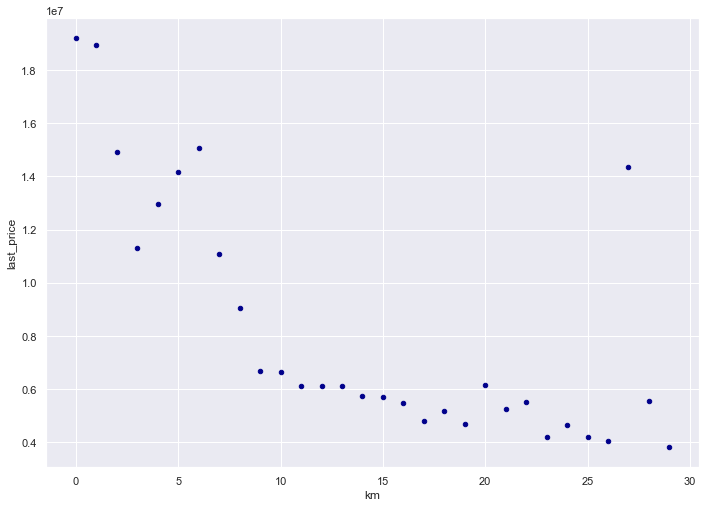

In [25]:
df_spb = df[df.locality_name == 'Санкт-Петербург']
df_spb['km'] = df_spb['cityCenters_nearest']//1000
price_mean = df_spb.groupby(['km']).agg({'last_price' : 'mean'}).round(2).reset_index()
ax1 = price_mean.plot.scatter(x='km',
                      y='last_price', c='DarkBlue')

<font color='green'><b>Вывод:</b> Квартиры удаленностью 7км и меньше от центра находятся в центральной зоне, так как на 8 киллометре идет резкий скачек вниз по цене.
</font> 

* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [26]:
spb_centr = df_spb[df_spb.km <= 7]

total_area 
mean:  89.3573202054794
last_price 
mean:  13769389.93150685
rooms 
mean:  2.7572773972602738
ceiling_height 
mean:  3.0619820205479473


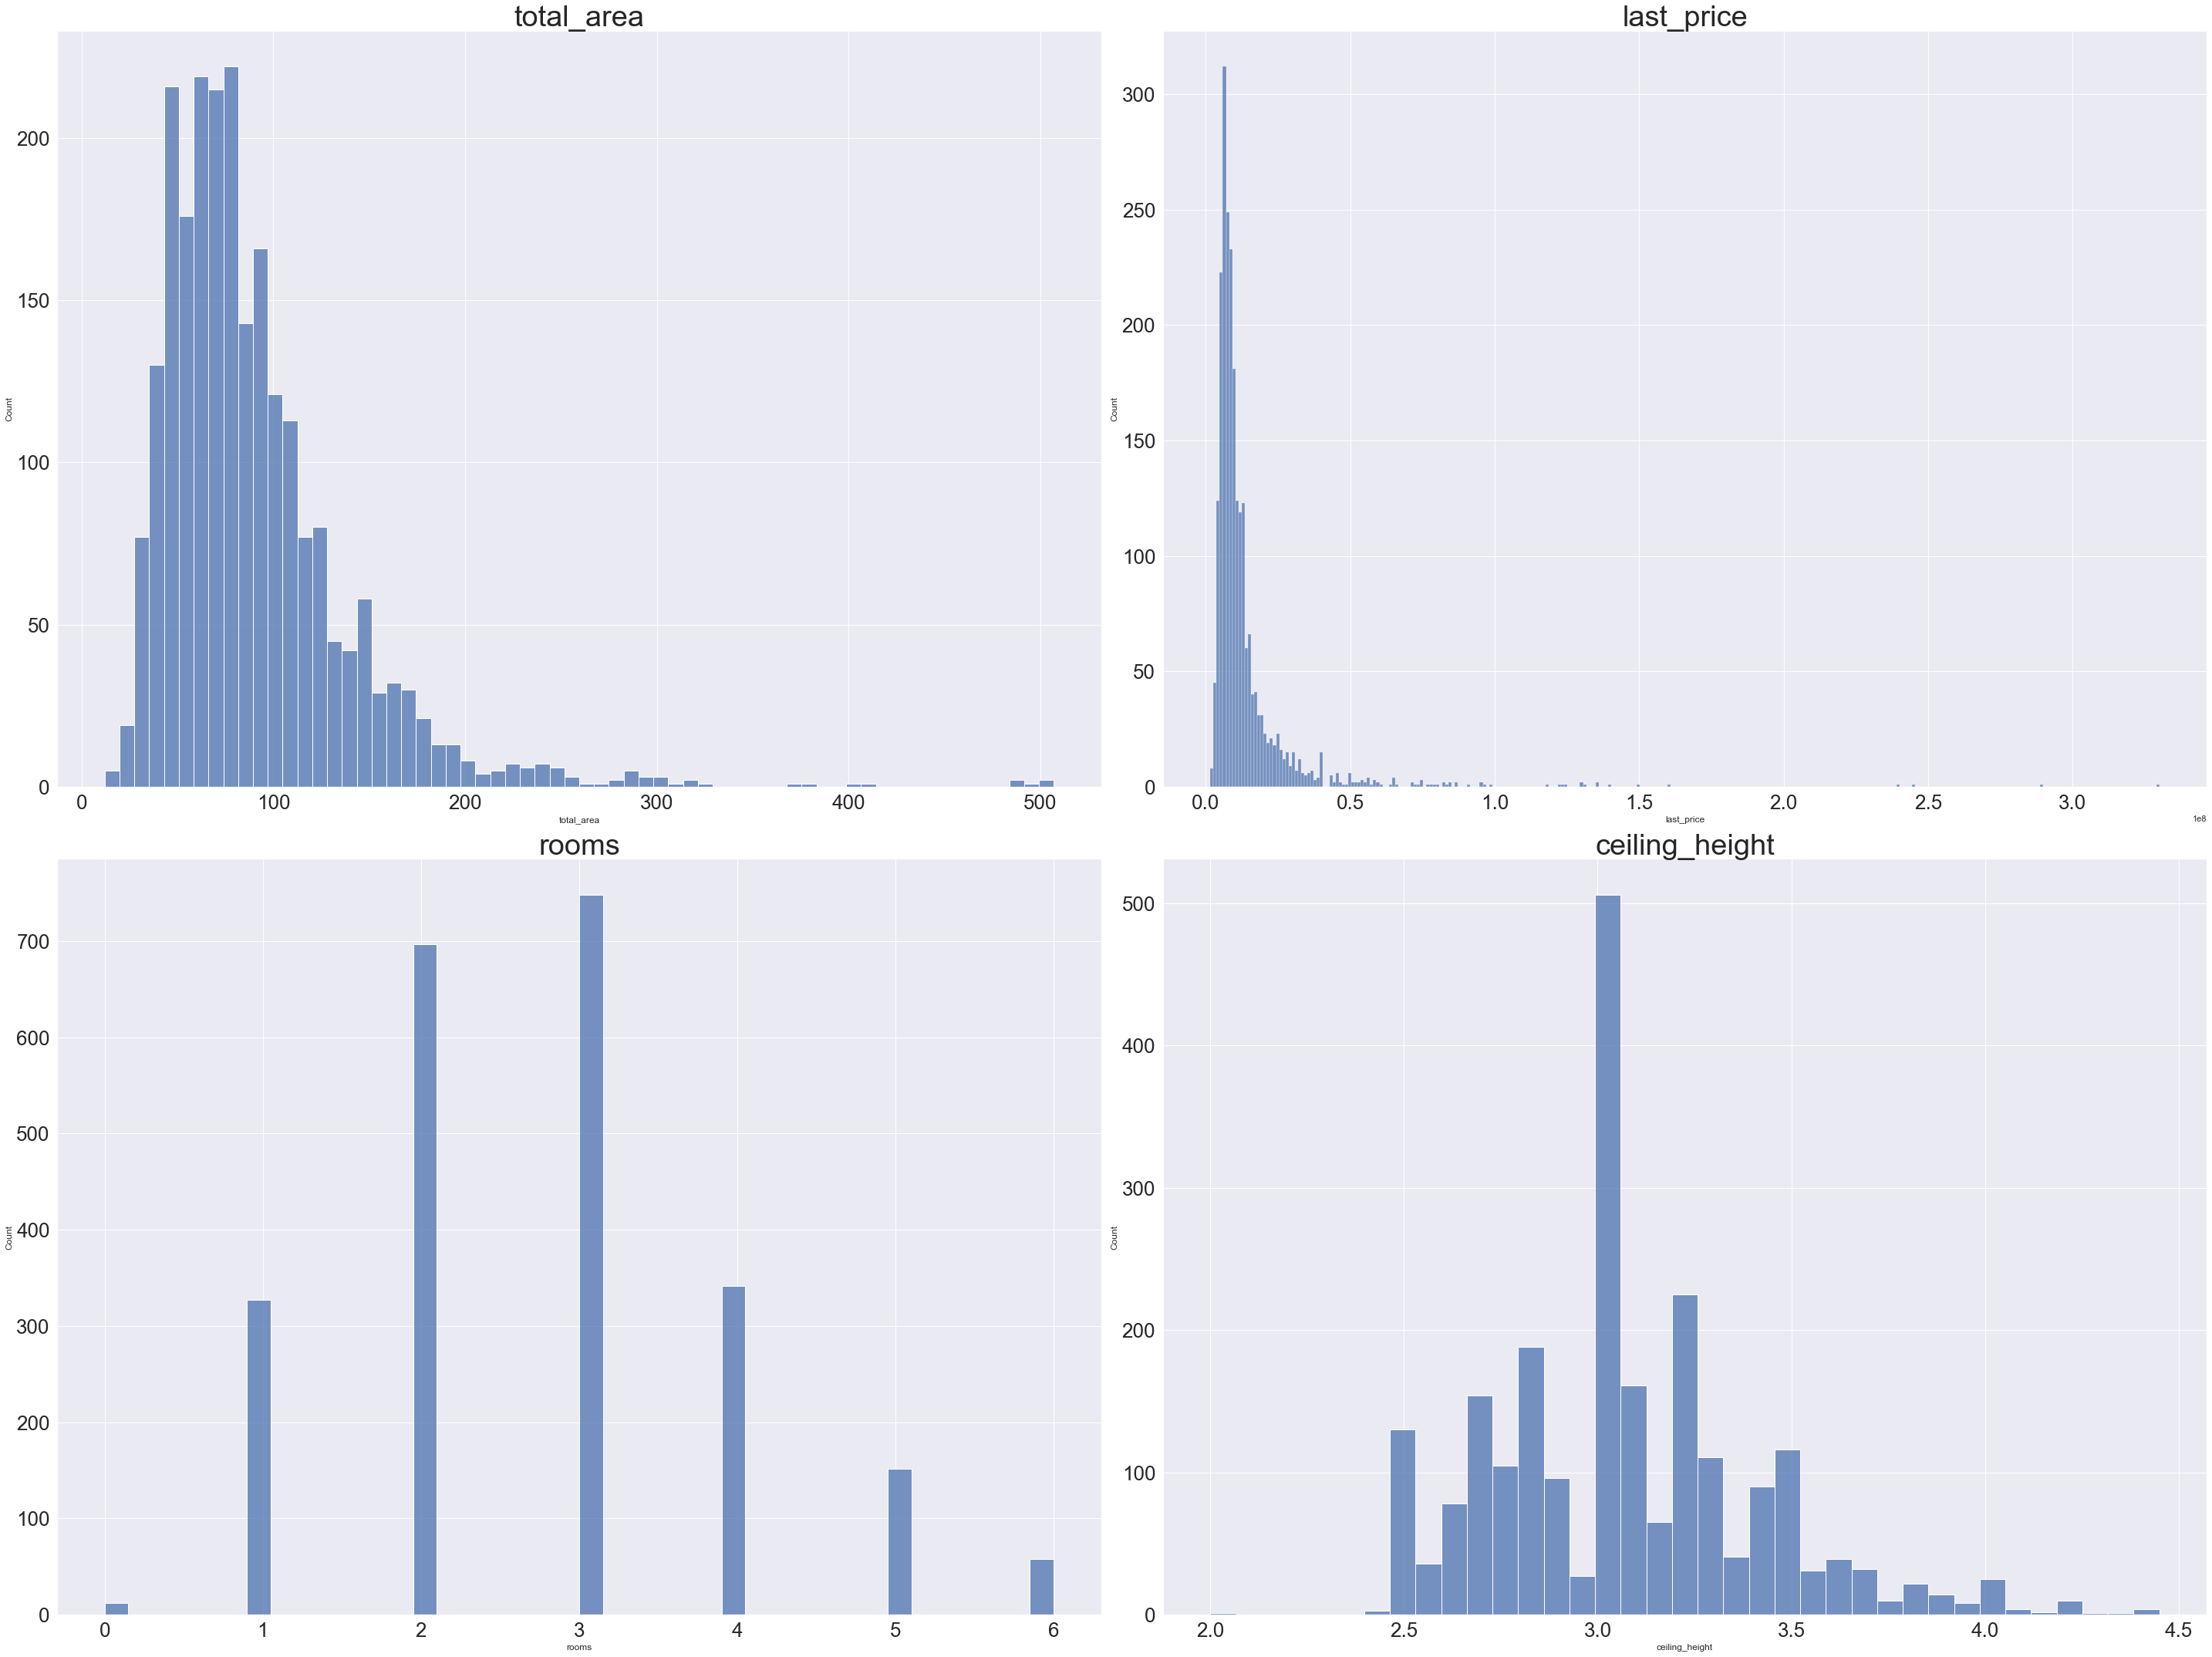

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(40, 30))

names = [['total_area', 'last_price'], ['rooms', 'ceiling_height']]

for i in range(2):
    for j in range(2):
        column_name = names[i][j]
        print(column_name, '\nmean: ', spb_centr[column_name].mean())
        ax = axs[i, j]
        sns.histplot(ax=ax, data=spb_centr, x=column_name)
        ax.tick_params(axis='x', labelsize = 26)
        ax.tick_params(axis='y', labelsize = 26) 
        ax.set_title(column_name, fontsize=38)
        
fig.tight_layout()
plt.show()

<font color='green'><b>Вывод:</b> По графикам видно, что значения площади, цены, количетсва комнат и высоты потолка соответствуют нормальное распределению со смещением влево. Среднее значение площади составляет 89 квдаратных метров, средняя цена 13,7 млн. В большей степени продаются трехкомнатные квартиры и высота потолков около 3 м.</font>

<ipython-input-28-21b4fde854ea>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\katia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


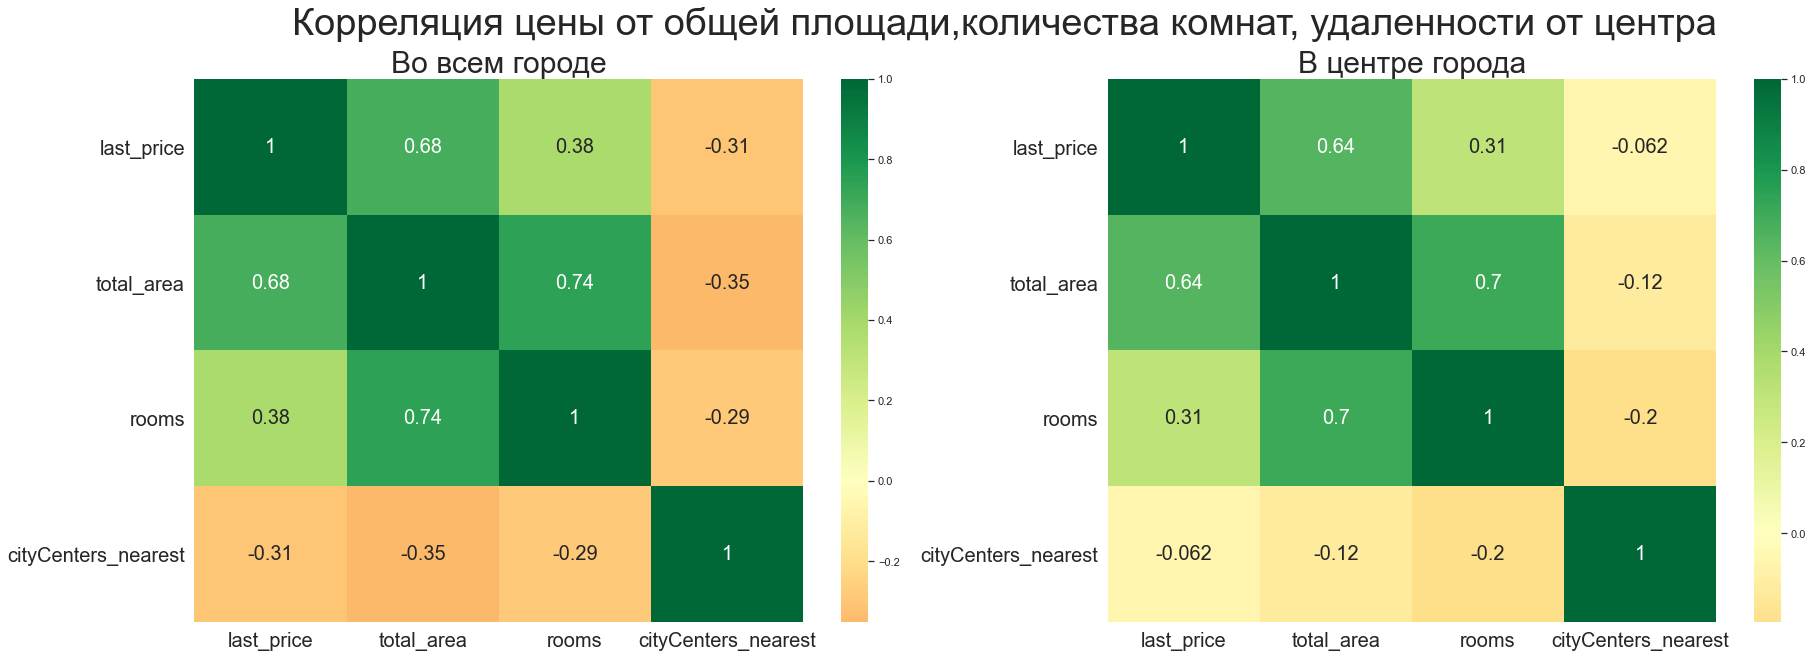

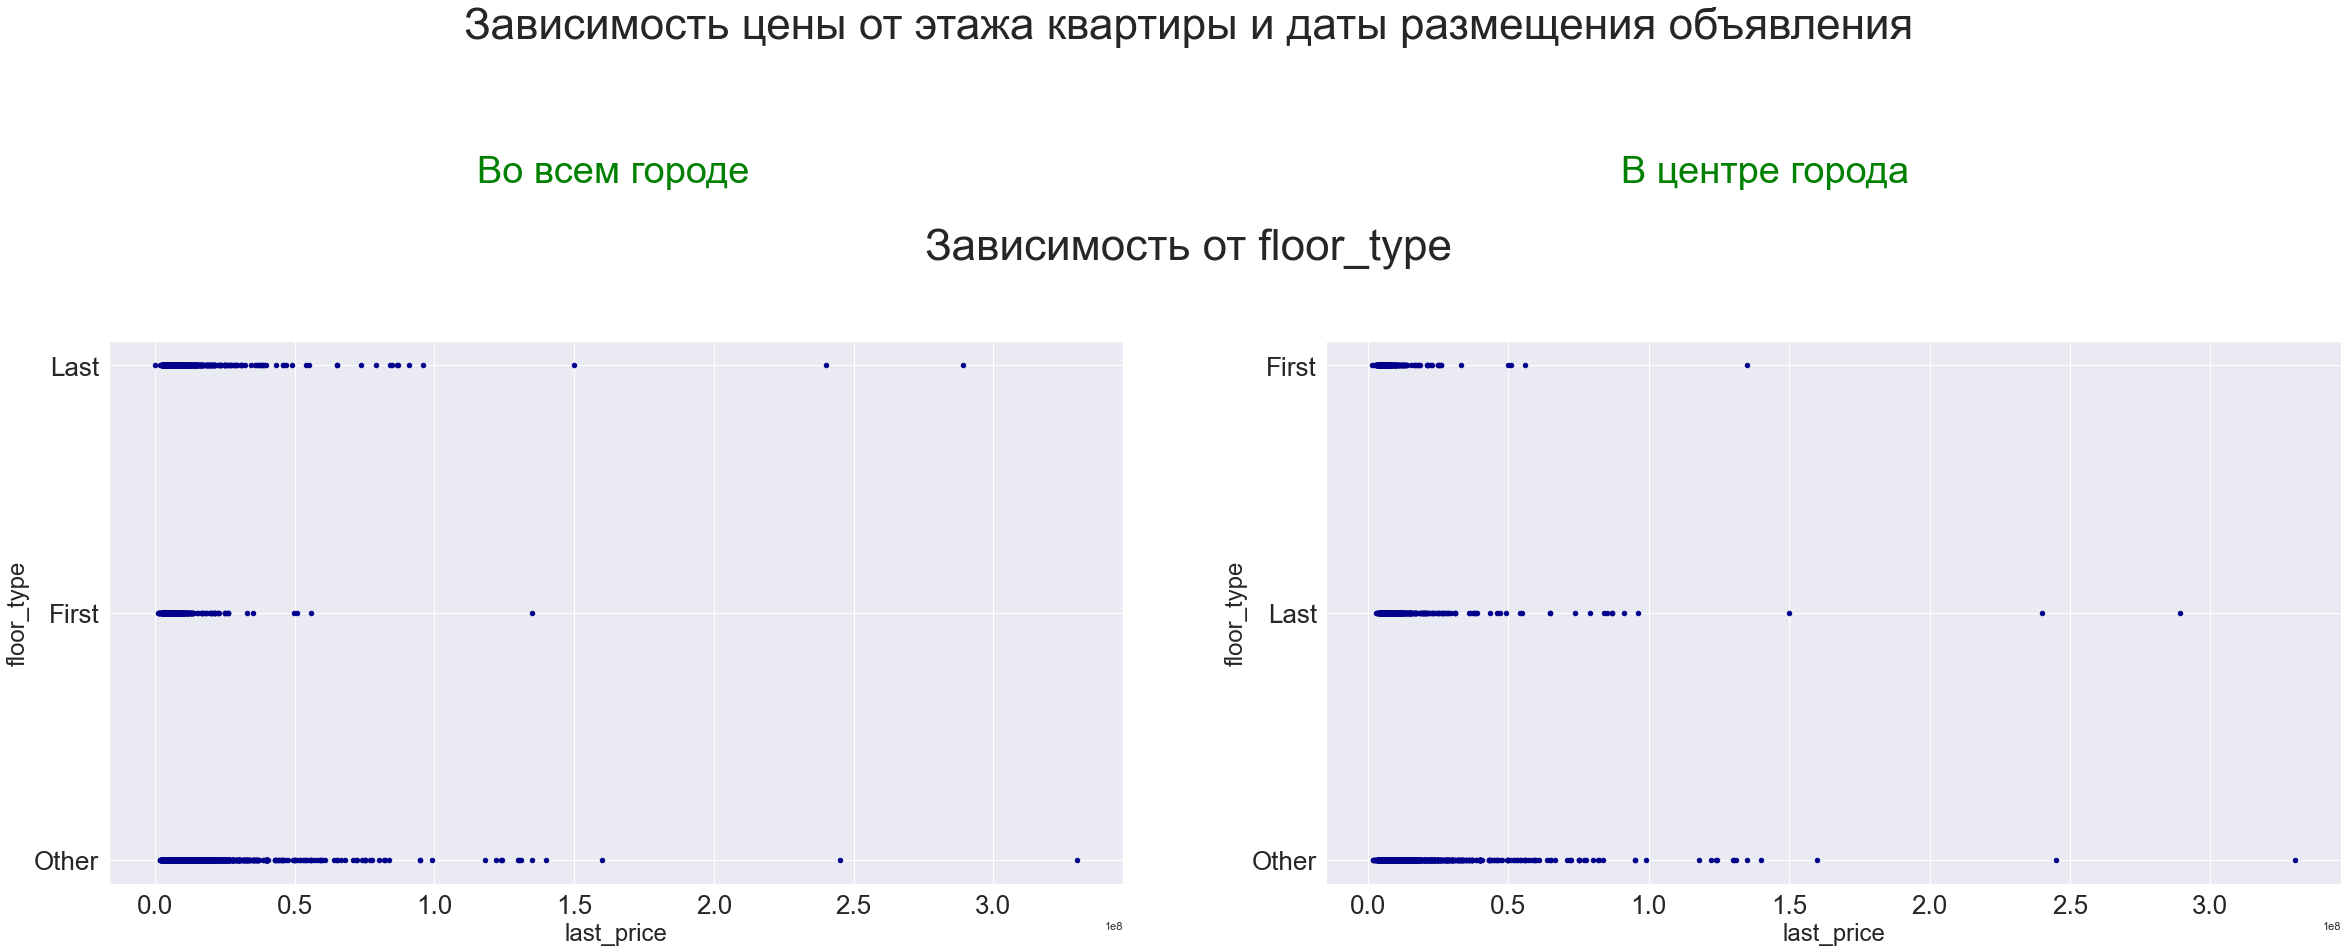

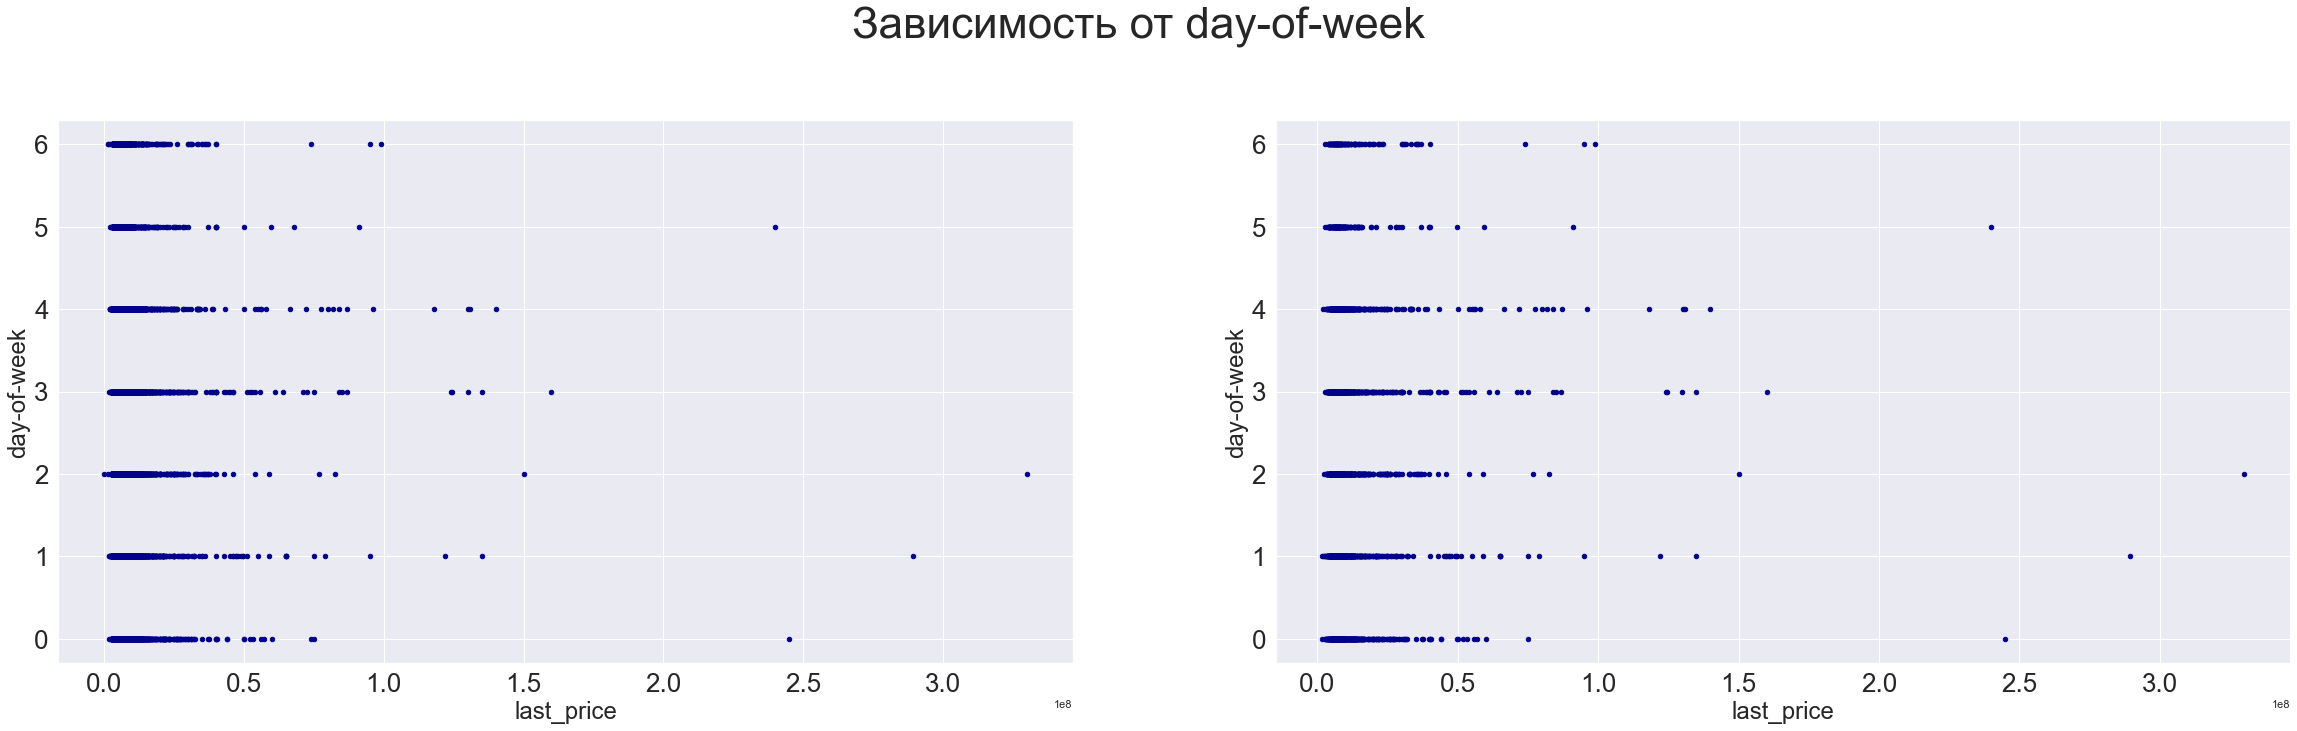

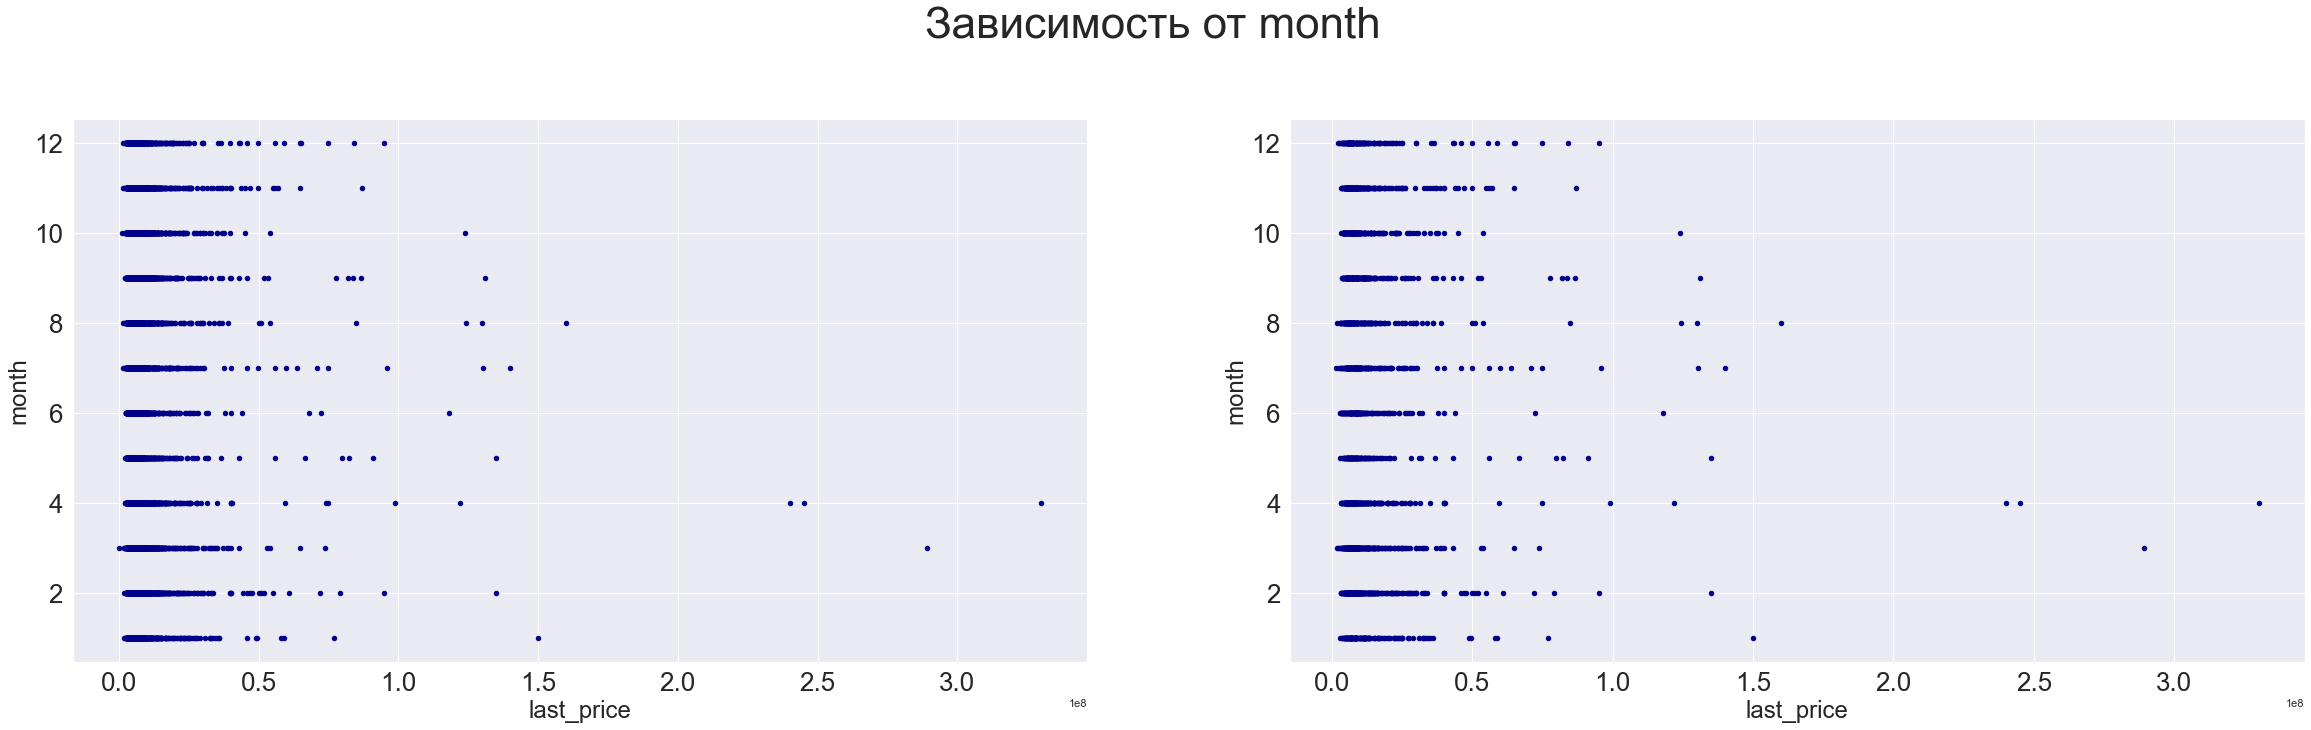

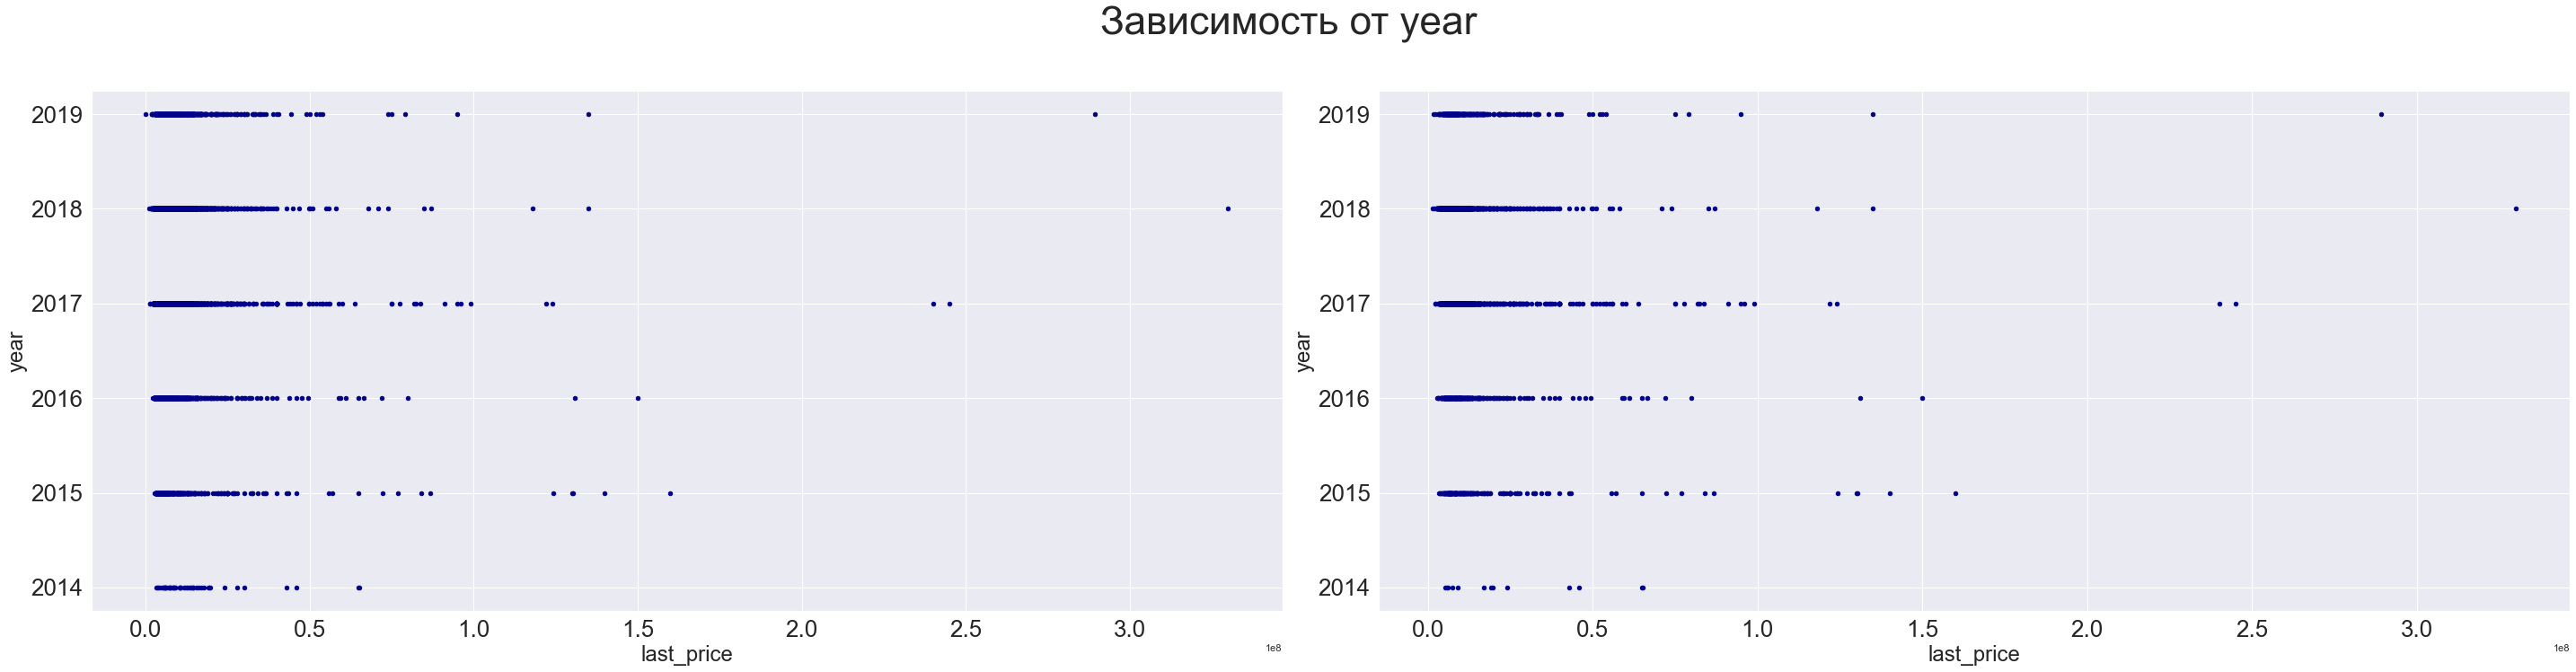

In [28]:
df_names = [df_spb, spb_centr]

fig, ax =plt.subplots(1,2, figsize=(30, 10))
fig.suptitle('Корреляция цены от общей площади,количества комнат, удаленности от центра', fontsize=38)


corr_names = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']

for i in range(len(df_names)):
    corr_df = df_names[i][corr_names]
    sns.heatmap(corr_df.corr(), 
                xticklabels=corr_df.corr().columns, yticklabels=corr_df.corr().columns, 
                cmap='RdYlGn', center=0, annot=True, ax=ax[i], annot_kws={"fontsize":20})
    ax[0].set_title('Во всем городе', fontsize=30)
    ax[1].set_title('В центре города', fontsize=30)
    ax[i].tick_params(axis='x', labelsize = 20) 
    ax[i].tick_params(axis='y', labelsize = 20, rotation=0)
        

plt.yticks(rotation=0) 
fig.show()



suptitle = True
names = ['floor_type', 'day-of-week', 'month', 'year']

for name in names:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
    fig.suptitle('Зависимость от {}'.format(name), va='bottom', fontsize=44)
    if suptitle:
        fig.text(0.30, 1.1, 'Во всем городе', ha='center', fontsize=38, c='green')
        fig.text(0.70, 1.1, 'В центре города', ha='center', fontsize=38, c='green')
        fig.text(0.5, 1.3, 'Зависимость цены от этажа квартиры и даты размещения объявления', ha='center', fontsize=44) 
    suptitle = False
   
    for i in range(len(df_names)):
        df_names[i].plot.scatter(x='last_price',  y=name,c='DarkBlue', ax=ax[i])
        ax[i].tick_params(axis='x', labelsize = 26)
        ax[i].tick_params(axis='y', labelsize = 26)
        ax[i].set_ylabel(name, fontsize=24)
        ax[i].set_xlabel('last_price', fontsize=24)
        
fig.tight_layout()
plt.show()

<font color='green'><b>Вывод:</b> Были рассмотрены квартиры, относящиеся к центральной части Санкт-Петербурга и все квартиры города. Зависимости у двух выборок одинаковые за исключением параметра близости к центру города. Так как квартиры, находящиеся в центральной зоне имеют одинаковую приоритетность по этой категории. 
</font>

# Шаг 5. Напишите общий вывод


<font color='green'><b>Вывод:</b> В данных много пропещнных значений, некоторые из них были восполнены. Количество балконов было заменено на ноль, а площадь кухни и жилая площадь дополнены относительно среднего их процентного соотношения с общей площадью. Редкие и выбивающиеся значения (количество комнат большее 7 и высота потолков большая 5) были удалены из выборки. Относительно общей выборки среднее значение площади квратир составляет 60 квдаратных метров, средняя цена 6,6 млн. В большей степени продаются двухкомнатные квартиры с высотой потолков около 2,7м. В среднем продажа занимает около 190 дней. В большей степени цена зависит от площади квартиры, количества комнат и степени удаленности от центра населенного пункта.  
    Также были выделены топ10 населённых пунктов с наибольшим числом объявлений. Из них самая высокая цена за квадратный метр у Санкт-Петербурга, она составляет в среднем 115309р. Самая низкая стоимость во Всеволожске - 67344р. По статистике, проведенной по Санкт-Петербургу, центральная часть города находится на расстоянии от центра менее чем 7 километров. Квартиры этой области имеют в среднем большую площадь, большее количество комнат и более высокие потолки. 
</font>